IA & Data science (LU3IN0226) -- 2019-2020
--------
*&copy; Equipe pédagogique: Gauvain Bourgne, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME02 : programmation du perceptron

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*BRANECI Sofiane et HAMDAD Khellaf*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-02</tt> et rajouter à la suite de <tt>tme-02</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-02-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echéancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Présentation ##

Dans ce TME, nous allons mettre en place une "architecture" de code nous permettant petit à petit de tester tout au long du semestre différents modèles d'apprentissage supervisé. Dans nos séances, nous allons nous restreindre au cas binaire où les données sont étiquetées $+1$ ou $-1$.


### Objectifs de ce TME

Le travail à réaliser est le suivant :
- continuer à apprendre à (bien) utiliser jupyter notebook
- générer aléatoirement des datasets jouets pour expérimenter
- se familiariser avec la classe `Classifier` et implémenter un premier classifieur simple
- implémenter l'algorithme du perceptron de Rosenblatt
- réaliser des expérimentations pour étudier les performances de cet algorithme

Les imports suivants seront généralement nécessaires pour nos séances:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

**Remarque :** La concaténation de vecteurs s'obtient à l'aide de la fonction `vstack` de numpy.

In [2]:
# Exemple d'utilisation de vstack (pour plus de détails, chercher la documentation sur le web)

vecteur_1 = np.array([0, 1.5, 4.2])
vecteur_2 = np.array([1.1, 3.8, 20.01])

vecteur_3 = vecteur_1 + vecteur_2

np.vstack( (vecteur_1, vecteur_2, vecteur_3) )

array([[ 0.  ,  1.5 ,  4.2 ],
       [ 1.1 ,  3.8 , 20.01],
       [ 1.1 ,  5.3 , 24.21]])

## Étape 1: dataset

La première étape consiste à construire un ensemble de données d'apprentissage, que l'on appelle par la suite simplement *dataset*.

Un dataset est un ensemble de couples $\{(x_1,y_1),...,(x_n,y_n)\}$. 

Pour nos implémentations, les $x_i$ et $y_i$ seront des tableaux qui seront stockés sous la forme de <code>ndarray</code> Numpy.


### Génération de données ''Jouet''

Nous allons pour l'instant nous intéresser à des datasets "jouet" générés selon des distributions choisies à la main. 

Pour pouvoir visualiser nos données, nous allons nous restreindre à des dataset en 2 dimensions pour la description (entrée $x_i$ ) et le label (sortie $y_i$). On aura donc ici: $x_i \in \mathbb{R}^2$ et $y_i \in \{-1;+1\}$.

#### Tirage aléatoire selon une loi uniforme

Commençons par un dataset dont les données sont générées par un tirage aléatoire selon une loi uniforme.

Pour cela, nous utiliserons la fonction `numpy.random.uniform`:

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html

Cette fonction renvoie :
- soit un nombre réel obtenu par un tirage aléatoire
- soit `ndarray` dont les dimensions ont été précisées et qui contient un ensemble de nombres réels tirés aléatoirement

In [3]:
np.random.uniform()  # rend un réel aléatoire de l'intervalle [0.0, 1.0[ (tirage uniforme)

0.26574219109104047

In [4]:
np.random.uniform(-7,5) # rend un réel aléatoire de l'intervalle [-7, 5[ (tirage uniforme)

-3.012535676203229

In [5]:
np.random.uniform(-7,5,(4,3)) # rend un tableau de 4x3 réels aléatoires de l'intervalle [-7, 5[ (tirage uniforme)

array([[-5.10377831,  0.08600162, -1.07413828],
       [ 4.54242311, -0.4417407 ,  4.10581637],
       [-5.36811642, -5.28953598,  1.72728983],
       [-5.98418196, -6.30980885, -4.5577258 ]])

Pour générer aléatoirement les labels (qui sont donc des valeurs de {-1, +1}), une contrainte supplémentaire s'ajoute: on souhaite que dans le dataset, il y ait autant d'exemples de chaque classe.

Ainsi, si on veut générer un ensemble de 20 labels de telle sorte qu'il y ait exactement 10 valeurs -1 et 10 valeurs +1 dans cet ensemble, la méthode la plus simple est de construire une liste en additionnant une liste de 10 valeurs -1 et une liste de 10 valeurs +1. Pour notre implémentation, cette liste doit ensuite être convertie en `ndarray`.

In [6]:
Lnd = np.asarray([-1 for i in range(0,10)] + [+1 for i in range(0,10)])
print("type :", type(Lnd))
Lnd

type : <class 'numpy.ndarray'>


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Lors de la mise au point d'un programme qui utilise l'aléatoire, il est important de pouvoir travailler sur des séquences aléatoires qui soient toujours les mêmes.
Pour cela, on doit préciser une initialisation de la séquence aléatoire, cela se fait en utilisant la commande `numpy.random.seed` :

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html

Cette fonction permet de donner une valeur (que l'on nomme la *graine* de la séquence) pour initialiser la séquence de tirages aléatoires, ainsi, avec la même valeur donnée on obtiendra toujours la même séquence de tirages aléatoires.

Par exemple :

In [7]:
np.random.seed(42)
np.random.uniform(-10,10,10)

array([-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
       -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156])

In [8]:
np.random.seed(42)
np.random.uniform(-10,10,10)

array([-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
       -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156])

<font color="RED" size="+1">**[Q]**</font> En utilisant la fonction précédente, créer 2 variables :
- `data_desc` : qui est un tableau de 100 exemples de dimension 2 dont les valeurs sont tirées aléatoirement dans l'intervalle [-5,5) 
- `data_label` : qui est un tableau de 100 entiers de {-1,+1} tirés aléatoirement de façon uniformes et tel qu'il y ait autant de valeurs de chaque.

In [41]:
np.random.seed(42)   # on prend 42 comme graine

# ------------------------ A COMPLETER :
data_desc = np.random.uniform(low=-5,high=5,size=(100, 2))
data_label = np.asarray([-1 for i in range(0,50)] + [+1 for i in range(0,50)])

In [10]:
data_desc[0:5,:]

array([[-1.25459881,  4.50714306],
       [ 2.31993942,  0.98658484],
       [-3.4398136 , -3.4400548 ],
       [-4.41916388,  3.66176146],
       [ 1.01115012,  2.08072578]])

In [11]:
# maximum des valeurs par colonne:
data_desc.max(0)

array([4.85650454, 4.86886937])

In [12]:
# minimum des valeurs par colonne:
data_desc.min(0)

array([-4.94477883, -4.83412171])

In [13]:
data_label[0:5]

array([-1, -1, -1, -1, -1])

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `genere_dataset` qui prend en argument le nombre de dimenstions $p$, le nombre $n$  d'exemples de chaque classe, ainsi que 2 valeurs pour les bornes inférieure et supérieure des valeurs de description, et qui renvoie un tuple dont le premier composant est un `ndarray` contenant les vecteurs de description et le deuxième composant est un `ndarray` contenant les labels correspondant (en respectant l'équirépartition des labels).
On fera l'hypothèse que $n$ est toujours un nombre pair.

In [32]:
# ------------------------ A COMPLETER :
def genere_dataset_uniform(p, n, low, high):
    data = np.random.uniform(low, high, (n, p))
    labels = np.asarray([-1 for i in range(0,n//2)] + [+1 for i in range(0,n//2)])
    np.random.shuffle(labels)
    return data, labels
    

In [33]:
np.random.seed(42)   # on prend 42 comme graine

# Génération d'un dataset de 20 exemples :
d_desc, d_lab = genere_dataset_uniform(2,10,-5,5)

In [34]:
print(d_desc)
print(d_lab)

[[-1.25459881  4.50714306]
 [ 2.31993942  0.98658484]
 [-3.4398136  -3.4400548 ]
 [-4.41916388  3.66176146]
 [ 1.01115012  2.08072578]
 [-4.79415506  4.69909852]
 [ 3.32442641 -2.87660889]
 [-3.18175033 -3.1659549 ]
 [-1.95757757  0.24756432]
 [-0.68054981 -2.0877086 ]]
[-1  1 -1  1 -1  1  1 -1 -1  1]


In [35]:
d_desc[0:5,:]

array([[-1.25459881,  4.50714306],
       [ 2.31993942,  0.98658484],
       [-3.4398136 , -3.4400548 ],
       [-4.41916388,  3.66176146],
       [ 1.01115012,  2.08072578]])

In [36]:
d_lab[0:5]

array([-1,  1, -1,  1, -1])


Un dataset en 2 dimensions peut être affiché en utilisant les fonctions de la librairie `matplotlib` et plus précisément la fonction `matplotlib.pyplot.scatter` permettant de dessiner un nuage de points: 

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

Par exemple :

Text(0.5, 1.0, 'scatter plot de dataset jouer ')

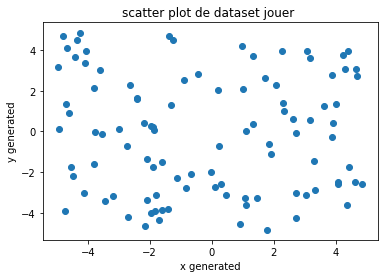

In [42]:
# Affichage de l'ensemble des exemples :
plt.scatter(data_desc[:,0],data_desc[:,1],marker='o')
plt.xlabel("x generated")
plt.ylabel("y generated")
plt.title("scatter plot de dataset jouer ")

Il est intéressant de  faire un affichage des points qui tient compte de la classe et utiliser des couleurs différentes pour afficher les points. Pour faire cela, il faut commencer par séparer les exemples selon leur classe : ceux de classe -1 et ceux de classes +1. On utilise pour cela la puissance des `ndarray` pour faire des sélections (slices).

In [43]:
# Extraction des exemples de classe -1:
data_negatifs = data_desc[data_label == -1]
# Extraction des exemples de classe +1:
data_positifs = data_desc[data_label == +1]

On peut alors afficher les points en leur donnant une couleur (''marker'') différente.

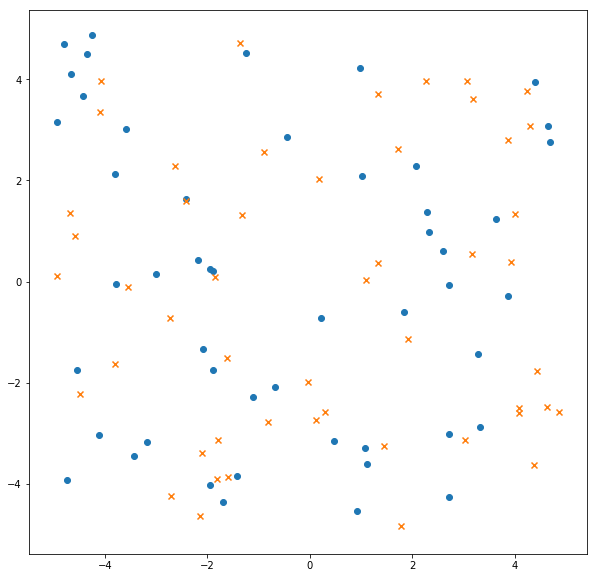

In [44]:
# Affichage de l'ensemble des exemples :
plt.figure(figsize=(10,10))
plt.scatter(data_negatifs[:,0],data_negatifs[:,1],marker='o') # 'o' pour la classe -1
plt.scatter(data_positifs[:,0],data_positifs[:,1],marker='x') # 'x' pour la classe +1

<font color="RED" size="+1">**[Q]**</font> En utilisant les instructions précédentes, écrire la fonction `plot2DSet` qui, étant donné deux `ndarray`, un donnant des descriptions et l'autre les labels correspondants, affiche une représentation graphique de ce jeu de données.

In [45]:
# ------------------------ A COMPLETER :
def plot2DSet(data, labels):
    # Extraction des exemples de classe -1:
    data_negatifs = data[labels == -1]
    # Extraction des exemples de classe +1:
    data_positifs = data[labels == +1]
#     plt.figure(figsize=(10,10))
    plt.scatter(data_negatifs[:,0],data_negatifs[:,1],marker='o') # 'o' pour la classe -1
    plt.scatter(data_positifs[:,0],data_positifs[:,1],marker='x') # 'x' pour la classe +1
    

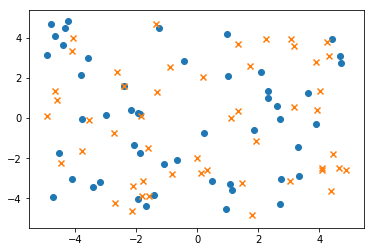

In [46]:
# si tout est ok, l'appel suivant affiche exactement la même chose que précédemment
plot2DSet(data_desc,data_label)

#### Tirage aléatoire selon une loi normale


Pour obtenir un dataset plus ''réaliste'', la loi uniforme n'est pas idéale, il est préférable de générer des dataset en utilisant un tirage aléatoire selon une loi normale (ie. représentée par une gaussienne).

Pour cela, nous utiliserons la fonction `numpy.random.multivariate_normal` :

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.multivariate_normal.html?highlight=gaussian


Dans ce qui suit, on considère toujours un dataset en 2 dimensions (entrée) et 1 dimension (sortie) comme précédemment.

La façon de procéder avec un tel tirage est différente de celle utilisée dans le cas uniforme: 
- on commence par tirer aléatoirement tous les exemples de la classe -1
- puis on tire aléatoirement tous les exemples de la classe +1
- on fusionne ces 2 ensembles en les mettant bout à bout
- le tableau des labels est donc facile à construire: d'abord les -1 puis les +1


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>genere_dataset_gaussian</tt> qui, étant donné 5 arguments:
- `positive_center` est le centre de la gaussienne des points positifs (vecteur de taille 2)
- `positive_sigma` est la variance de la gaussienne des points positifs (sous forme de matrice 2*2)
- `negative_center` est le centre de la gaussienne des points négative (vecteur de taille 2)
- `negative_sigma` est la variance de la gaussienne des points négative (sous forme de matrice 2*2)
- `nb_points` est le nombre de points de chaque classe à générer

rend un dataset généré aléatoirement en suivant une loi normale.

In [24]:
np.random.multivariate_normal(np.array([1,1]),np.array([[1,0],[0,1]]), 10)

array([[-0.01283112,  1.31424733],
       [ 0.09197592, -0.4123037 ],
       [ 2.46564877,  0.7742237 ],
       [ 1.0675282 , -0.42474819],
       [ 0.45561728,  1.11092259],
       [-0.15099358,  1.37569802],
       [ 0.39936131,  0.70830625],
       [ 0.39829339,  2.85227818],
       [ 0.98650278, -0.05771093],
       [ 1.82254491, -0.22084365]])

In [263]:
# ------------------------ A COMPLETER :
def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_point):
    data_negative = np.random.multivariate_normal(positive_center, positive_sigma, nb_point)
    data_positive = np.random.multivariate_normal(negative_center, negative_sigma,nb_point)
    data = np.vstack((data_negative, data_positive))
    labels = np.asarray([-1 for i in range(0,nb_point)] + [+1 for i in range(0,nb_point)])
    return data, labels

Taille du dataset généré : (20, 2) exemples (20,)


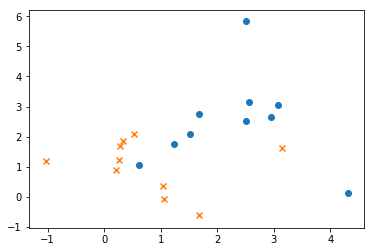

In [264]:
# Exemple d'utilisation:

data_desc, data_label = genere_dataset_gaussian(np.array([2,2]),np.array([[1,0],[0,1]]),np.array([1,1]),np.array([[1,0],[0,1]]),10)

print("Taille du dataset généré :", np.shape(data_desc), "exemples", data_label.shape)

# Affichage :
plot2DSet(data_desc,data_label)


In [168]:
data_desc.size

40

## Étape 2: les classifieurs

Un classifieur (binaire dans ce cours) permet, pour chaque point d'entrée donné, de calculer un score (qui est une valeur de $\mathbb{R}$). Si le score est strictement négatif, la donnée est associée à la classe $-1$, sinon à la classe $+1$. 


### Représentation orientée objets

Pour implémenter nos algorithmes d'apprentissage et pour représenter les données, nous allons utiliser quelques éléments de programmation orientée objet (POO) qu'autorise le langage Python. 

Si vous ne connaissez rien à la POO, il est fortement conseillé de lire une documentation ou suivre un tutorial sur le web (par exemple, http://apprendre-python.com/page-apprendre-programmation-orientee-objet-poo-classes-python-cours-debutants).


### La classe Classifier

Les classifieurs que l'on va implémenter seront définis à l'aide d'une classe qui va dériver de la classe `Classifier` suivante. Cette classe est une classe "abstraite", elle sera dérivée par héritage pour définir des classifieurs particuliers (knn, arbres de décision, etc.).

Cette classe contient 5 méthodes:
- `__init__`: qui permet d'initialiser les paramètres du classifieur. Les classes filles étendront cette méthode en rajoutant les paramètres qui les concernent. Le paramètre obligatoire d'un classifieur est le nombre de dimensions des données qu'il aura à traiter.
- `train`: c'est la méthodes qui permet d'entraîner le modèle, on doit donc donner en argument le dataset qui sert à l'entraînement.
- `score`: cette méthode est utilisée une fois le classifieur entrainé. Elle prend en argument la description d'un exemple et elle rend un score (une valeur de $\mathbb{R}$).
- `predict`: cette méthode, comme la précédente, s'utilise une fois le classifieur entraîné, elle donne le label (-1 ou bien +1) qui est prédit par le classifieur pour la description d'exemple donnée en argument. Généralement, cette valeur de prédiction s'obtient à partir du score: si le score est strictement négatif la prédiction vaut  $-1$, sinon elle vaut $+1$.
- `accuracy`: comme les 2 précédentes, cette méthode s'utilise une fois le classifieur entraîné. Elle permet de calculer la qualité du classifieur sur un dataset donné, cette qualité est le taux de bonne classification du classifieur sur le dataset. C'est donc une valeur de $[0,1]$ qui s'obtient divisant le nombre d'exemples du dataset qui sont bien classés par le classifieur par le nombre total d'exemples du dataset.

Les méthodes `train`, `score` et `predict` ne seront pas définies dans la classe `Classifier` mais dans les classes qui hériteront ce cette classe car ces méthodes dépendent du modèle que l'on choisira d'implémenter.

Par contre, la fonction `accuracy` renvoie le pourcentage de points bien classés. Elle peut être définie dès maintenant dans cette classe `Classifier`.


<font color="RED" size="+1">**[Q]**</font> Compléter la classe `Classifier` ci-dessous en donnant l'implémentation de la fonction `accuracy`. Penser à déjà bien examiner les méthodes existantes dans la classe (et que l'on peut utiliser avant qu'elles soient implémentées).

In [110]:
# ------------------------ A COMPLETER :
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        if input_dimension <= 0:
            raise ValueError('input_dimention doit être positife')
        self.input_dimension = input_dimension
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # TODO !!!!
        acc = 0
        for i in range(len(label_set)):
            if (self.predict(desc_set[i]) * label_set[i]) > 0:
                acc += 1
#         print(acc)
        return (acc/ len(label_set)) * 100
        # raise NotImplementedError("Please Implement this method")

### Un premier classifieur 
Nous allons maintenant définir un **classifieur linéaire aléatoire** en étendant la classe `Classifier` et en implémentant le constructeur ainsi que les 3 méthodes `predict`, `score` et `train`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on doit générer aléatoirement un vecteur $w$ de taille `input_dimension`
- pour ce classifieur, la méthode `train` ne fait rien. On ne mettra qu'un print permettant d'afficher le message "Pas d'apprentissage pour ce classifieur"
- pour une description d'exemple $x$, la méthode `score` doit utiliser la valeur de $\langle x | w\rangle$ pour prédire le label (+1 ou -1) associé
- pour une description d'exemple $x$, la méthode `predict` doit utiliser la valeur de $\langle x | w\rangle$ pour prédire le label (+1 ou -1) associé


<font color="RED" size="+1">**[Q]**</font> Compléter l'implémentation suivante de la classe <code>ClassifierLineaireRandom</code> qui hérite de la classe `Classifier` et permet de définir un classifieur linéaire aléatoire.

In [126]:
# ------------------------ A COMPLETER :
class ClassifierLineaireRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        Classifier.__init__(self, input_dimension)
        self.w = np.random.randn(input_dimension)
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        print("Pas d'apprentissage pour ce classifier !")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(self.w, x)
        # raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if self.score(x) > 0:
            return 1
        else:
            return -1
        #raise NotImplementedError("Please Implement this method")
    

Utilisation de la classe ainsi créée:

In [127]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un classifieur linéaire aléatoire de dimension 2:
un_classifieur = ClassifierLineaireRandom(2)

# Par définition, ce classifieur n'a pas besoin d'entraînement
un_classifieur.train(data_desc,data_label)
# plot2DSet(data_desc,data_label)
# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(data_desc.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data_desc[i,:][0], data_desc[i,:][1], \
                                                                  data_label[i], \
                                                                  un_classifieur.predict(data_desc[i,:]), \
                                                                  un_classifieur.score(data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(data_desc,data_label))   


Pas d'apprentissage pour ce classifier !
Classification du dataset:
	+1.648 +2.523 : -1 ---> +1 [+0.46959]
	+0.766 +0.766 : -1 ---> +1 [+0.27452]
	+2.579 +1.767 : -1 ---> +1 [+1.03676]
	+0.531 +1.543 : -1 ---> +1 [+0.05024]
	+0.537 +0.534 : -1 ---> +1 [+0.19266]
	+1.242 -0.913 : -1 ---> +1 [+0.74317]
	-0.725 +0.438 : -1 ---> -1 [-0.42060]
	-0.013 +1.314 : -1 ---> -1 [-0.18809]
	+0.092 -0.412 : -1 ---> +1 [+0.10269]
	+2.466 +0.774 : -1 ---> +1 [+1.11768]
	-0.932 -2.425 : +1 ---> -1 [-0.12792]
	-1.544 -0.889 : +1 ---> -1 [-0.64419]
	-2.151 -0.624 : +1 ---> -1 [-0.98211]
	-1.601 -1.292 : +1 ---> -1 [-0.61646]
	-1.602 +0.852 : +1 ---> -1 [-0.91343]
	-1.013 -2.058 : +1 ---> -1 [-0.21891]
	-0.177 -2.221 : +1 ---> +1 [+0.21892]
	-0.791 -2.960 : +1 ---> +1 [+0.01625]
	-2.328 -0.803 : +1 ---> -1 [-1.04540]
	-0.262 -0.829 : +1 ---> -1 [-0.01534]
Taux de bonne classification sur le dataset:  20.0


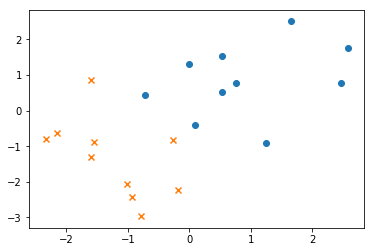

In [128]:
plot2DSet(data_desc,data_label)

In [129]:
data_desc.shape

(20, 2)


<font color="RED" size="+1">**[Q]**</font> Calculer la performance (*accuracy*) d'un classifieur linéaire aléatoire sur un dataset de 100 points générés aléatoirement.

In [131]:
classifieur = ClassifierLineaireRandom(2)
data, labels = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),50)
print("Taille du dataset généré :", np.shape(data), "exemples", labels.shape)

classifieur.train(data_desc,data_label)

# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(data.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data[i,:][0], data[i,:][1], \
                                                                  labels[i], \
                                                                  classifieur.predict(data[i,:]), \
                                                                  classifieur.score(data[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", classifieur.accuracy(data,labels))   

#print("Taux de bonne classification sur le dataset: ", classifieur.accuracy(data_desc,data_label))   

Taille du dataset généré : (100, 2) exemples (100,)
Pas d'apprentissage pour ce classifier !
Classification du dataset:
	+1.515 +1.514 : -1 ---> -1 [-3.50688]
	+1.515 +4.853 : -1 ---> -1 [-6.63825]
	+1.571 +2.136 : -1 ---> -1 [-4.16695]
	+1.954 +1.651 : -1 ---> -1 [-4.24068]
	+0.685 +1.759 : -1 ---> -1 [-2.59294]
	+0.227 +0.763 : -1 ---> -1 [-1.02870]
	+0.515 +1.082 : -1 ---> -1 [-1.72361]
	+3.315 -0.867 : -1 ---> -1 [-3.75316]
	+1.686 -0.613 : -1 ---> -1 [-1.74849]
	+0.528 +2.089 : -1 ---> -1 [-2.68657]
	+1.064 -0.078 : -1 ---> -1 [-1.39331]
	+0.285 +1.680 : -1 ---> -1 [-1.96739]
	+0.270 +1.216 : -1 ---> -1 [-1.51229]
	+1.046 +0.348 : -1 ---> -1 [-1.76719]
	+3.144 +1.634 : -1 ---> -1 [-5.86365]
	-1.025 +1.186 : -1 ---> +1 [+0.29962]
	+0.338 +1.852 : -1 ---> -1 [-2.20320]
	+0.207 +0.885 : -1 ---> -1 [-1.11606]
	+1.505 +1.866 : -1 ---> -1 [-3.82313]
	-0.200 +0.665 : -1 ---> -1 [-0.34818]
	+0.525 +0.347 : -1 ---> -1 [-1.04847]
	+2.765 +1.405 : -1 ---> -1 [-5.12751]
	-0.261 +1.918 : -1 --

Voici une fonction qui permet de dessiner la frontière de decision d'un classifieur. La valeur `step` permet de choisir la précision du dessin.

In [189]:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])
#     plot2DSet(data_desc,data_label)

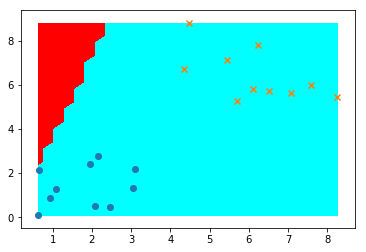

In [190]:
# Affichage de la frontière de séparation des classes
plot_frontiere(data_desc,data_label,un_classifieur)
plot2DSet(data_desc,data_label)

## Étape 3 : Perceptron de Rosenblatt

De la même façon que nous avons défini un classifieur aléatoire, nous allons maintenant définir un autre classifieur : le perceptron de Rosenblatt.

<font color="RED" size="+1">**[Q]**</font> En héritant de la classe `Classifier`, écrire la classe `ClassifierPerceptron` qui implémente l'algorithme du Perceptron vu en cours. A l'initialisation, on fournira le learning_rate (aussi noté epsilon) de ce perceptron.

La fonction `train` fera **une itération** sur l'ensemble des données de l'apprentissage. Les exemples d'apprentissage seront pris dans un ordre aléatoire choisi lors de l'exécution.



In [216]:
# ------------------------ A COMPLETER :
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension,learning_rate):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - learning_rate : epsilon
            Hypothèse : input_dimension > 0
        """
        Classifier.__init__(self, input_dimension)
        self.learning_rate = learning_rate
        self.w = np.random.rand(input_dimension) - 0.5 
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """ 
#        // print(self.w)
        
    
#         for data, label in zip(data_desc, labels):
#             print(data, label)
#         for _ in range(1000):
        for _ in range(1000):
            index = np.random.randint(len(data_desc))
            data = data_desc[index,:]
#             v = np.ones(3)
#             v[:len(data)] = data.copy()
            label = label_set[index]
            if (data @ self.w)* label < 0:
                self.w = self.w + (self.learning_rate *  data *  label)
        #raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
#         y = np.ones(3)
#         y[:len(x)] = x
        return (self.w @ x )
       #  raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
#         y = np.ones(len(x) + 1)
#         y[:len(x)] = x
        if (self.score(x)) > 0:
            return +1
        else:
            return -1
#         raise NotImplementedError("Please Implement this method")

    

Classification du dataset:
	+2.472 +0.470 : -1 ---> -1 [-0.25727]
	+3.039 +1.302 : -1 ---> -1 [-0.27692]
	+1.093 +1.279 : -1 ---> -1 [-0.05547]
	+2.078 +0.515 : -1 ---> -1 [-0.20981]
	+1.963 +2.429 : -1 ---> -1 [-0.09244]
	+3.107 +2.176 : -1 ---> -1 [-0.23719]
	+0.660 +2.149 : -1 ---> +1 [+0.04136]
	+0.940 +0.882 : -1 ---> -1 [-0.05954]
	+0.637 +0.089 : -1 ---> -1 [-0.06810]
	+1.433 +3.129 : -1 ---> +1 [+0.00629]
	+3.256 +0.426 : +1 ---> -1 [-0.34946]
	+2.086 +0.605 : +1 ---> -1 [-0.20578]
	-0.651 +1.701 : +1 ---> +1 [+0.16703]
	+1.235 +2.818 : +1 ---> +1 [+0.01204]
	-0.535 +3.796 : +1 ---> +1 [+0.26775]
	+2.592 +0.982 : +1 ---> -1 [-0.24315]
	+0.701 +0.284 : +1 ---> -1 [-0.06480]
	+1.110 +0.816 : +1 ---> -1 [-0.08259]
	+1.514 +0.706 : +1 ---> -1 [-0.13484]
	+2.415 +1.125 : +1 ---> -1 [-0.21514]
Taux de bonne classification sur le dataset:  55.00000000000001


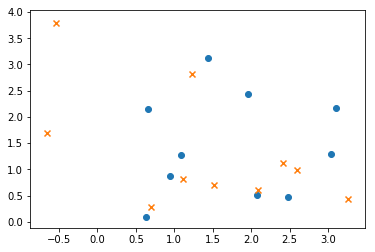

In [217]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée
plot2DSet(data_desc,data_label)
# Création d'un perceptron
un_perceptron = ClassifierPerceptron(2,0.1)

# Entraînement avec les données générées précédemment
un_perceptron.train(data_desc,data_label)

# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(data_desc.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data_desc[i,:][0], data_desc[i,:][1], \
                                                                  data_label[i], \
                                                                  un_perceptron.predict(data_desc[i,:]), \
                                                                  un_perceptron.score(data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_perceptron.accuracy(data_desc,data_label))   

<font color="RED" size="+1">**[Q]**</font> Tester le perceptron de la manière suivante:
- Initialiser un perceptron pour le dataset (data_desc,data_label) généré précédemment, ce perceptron aura un learning rate de $0.01$
- Apprendre pendant N itérations (tester pour N=10, 100, 1000)
- Afficher l'accuracy du modèle sur le dataset à chaque itération (vous pouvez tracer une courbe)
- Vérifier que l'accuracy baisse
- Tracer la frontière finale obtenue

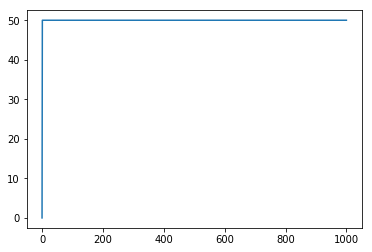

In [218]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# ------------------------ A COMPLETER :
iters = [10, 100, 1000]
lr = 0.1
acc = [0]

classifier = ClassifierPerceptron(2, lr)
for _ in range(1000):
    classifier.train(data_desc, data_label)
    acc.append(classifieur.accuracy(data_desc, data_label))
plt.plot(range(1001), acc)
plt.show()
    

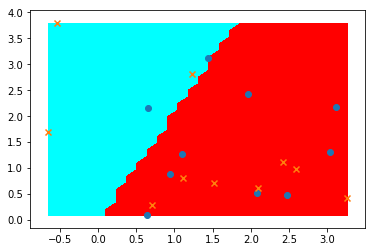

In [219]:
# Affichage de la frontière de séparation des classes
plot_frontiere(data_desc,data_label,un_perceptron)
plot2DSet(data_desc,data_label)

<font color="RED" size="+1">**[Q]**</font> Expérimentations

- Générer deux ensembles de train et de test
- Dessiner la courbe de performance en fonction de l'itération sur les ensembles de train et de test
    * Que se passe-t-il en fonction du pas (epsilon) d'apprentissage ? 
    * Que se passe-t-il quand le nombre d'exemples en apprentissage est faible ? 


In [257]:
np.random.seed(42)
train_data, train_label = genere_dataset_gaussian(np.array([2,2]),np.array([[1,0],[0,1]]),np.array([-4,-4]),np.array([[1,0],[0,1]]),10)
test_data, test_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,3]),np.array([[1,0],[0,1]]),10)
p = ClassifierPerceptron(2, 0.1)
print("Classification du dataset:")
for i in range(data_desc.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(train_data[i,:][0], train_data[i,:][1], \
                                                                  train_label[i], \
                                                                    p.predict(train_data[i,:]), \
                                                                   p.score(train_data[i,:])) )

print("Taux de bonne classification sur le dataset train: ", p.accuracy(train_data,train_label))
# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset test: ", p.accuracy(test_data,test_label))   

# Affichage :


Classification du dataset:
	+2.497 +1.862 : -1 ---> +1 [+0.55083]
	+2.648 +3.523 : -1 ---> +1 [+0.19586]
	+1.766 +1.766 : -1 ---> +1 [+0.27698]
	+3.579 +2.767 : -1 ---> +1 [+0.76495]
	+1.531 +2.543 : -1 ---> -1 [-0.01365]
	+1.537 +1.534 : -1 ---> +1 [+0.24161]
	+2.242 +0.087 : -1 ---> +1 [+0.89201]
	+0.275 +1.438 : -1 ---> -1 [-0.24833]
	+0.987 +2.314 : -1 ---> -1 [-0.17786]
	+1.092 +0.588 : -1 ---> +1 [+0.29771]
	-2.534 -4.226 : +1 ---> +1 [+0.02652]
	-3.932 -5.425 : +1 ---> -1 [-0.24272]
	-4.544 -3.889 : +1 ---> -1 [-0.87712]
	-5.151 -3.624 : +1 ---> -1 [-1.19073]
	-4.601 -4.292 : +1 ---> -1 [-0.79911]
	-4.602 -2.148 : +1 ---> -1 [-1.33705]
	-4.013 -5.058 : +1 ---> -1 [-0.36776]
	-3.177 -5.221 : +1 ---> +1 [+0.01388]
	-3.791 -5.960 : +1 ---> -1 [-0.05100]
	-5.328 -3.803 : +1 ---> -1 [-1.21811]
Taux de bonne classification sur le dataset train:  25.0
Taux de bonne classification sur le dataset test:  20.0


<font color="RED" size="+1">**[Q]**</font> **Données XOR**

Ecrire la fonction `create_XOR` qui, étant donné un nombre de points $n$ et une variance $var$, permet de générer un dataset de dimension 2 contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant chacune à $n$ exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant chacune à $n$ exemples négatifs

Dans la suite, on appelle XOR une base de données créée par cette fonction.


Que se passe-t-il quand on apprend un perceptron  ? Quel est le problème ? 

In [258]:
def create_XOR(n, var):
    p, l1 = genere_dataset_gaussian(np.array([0,0]), np.array([[var, 0], [0, var]]), np.array([1,0]), np.array([[var, 0],[0, var]]),n)
    q, l2 = genere_dataset_gaussian(np.array([1,1]), np.array([[var, 0], [0, var]]), np.array([0,1]), np.array([[var, 0],[0, var]]),n)
    
    data = np.vstack((p, q))
    labels = np.concatenate((l1, l2))
    return data, labels

In [259]:
data, labels = create_XOR(25,0.01)

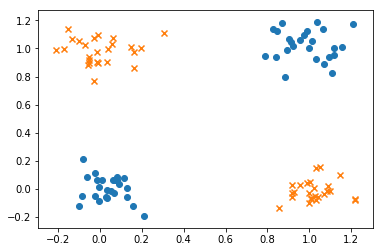

In [260]:
data_xor = create_XOR(25,0.01)
plot2DSet(data_xor[0], data_xor[1])

Classification du dataset:
	+0.050 -0.014 : -1 ---> +1 [+0.01542]
	+0.065 +0.152 : -1 ---> +1 [+0.06111]
	-0.023 -0.023 : -1 ---> -1 [-0.01447]
	+0.158 +0.077 : -1 ---> +1 [+0.07807]
	-0.047 +0.054 : -1 ---> -1 [-0.00465]
	-0.046 -0.047 : -1 ---> -1 [-0.02870]
	+0.024 -0.191 : -1 ---> -1 [-0.03693]
	-0.172 -0.056 : -1 ---> -1 [-0.07863]
	-0.101 +0.031 : -1 ---> -1 [-0.03066]
	-0.091 -0.141 : -1 ---> -1 [-0.06827]
	+0.147 -0.023 : -1 ---> +1 [+0.04987]
	+0.007 -0.142 : -1 ---> -1 [-0.03176]
	-0.054 +0.011 : -1 ---> -1 [-0.01787]
	-0.115 +0.038 : -1 ---> -1 [-0.03439]
	-0.060 -0.029 : -1 ---> -1 [-0.02969]
	-0.060 +0.185 : -1 ---> +1 [+0.02189]
	-0.001 -0.106 : -1 ---> -1 [-0.02598]
	+0.082 -0.122 : -1 ---> +1 [+0.00165]
	+0.021 -0.196 : -1 ---> -1 [-0.03930]
	-0.133 +0.020 : -1 ---> -1 [-0.04538]
	+0.074 +0.017 : -1 ---> +1 [+0.03199]
	-0.012 -0.030 : -1 ---> -1 [-0.01161]
	-0.148 -0.072 : -1 ---> -1 [-0.07313]
	-0.046 +0.106 : -1 ---> +1 [+0.00807]
	+0.034 -0.176 : -1 ---> -1 [-0.02948

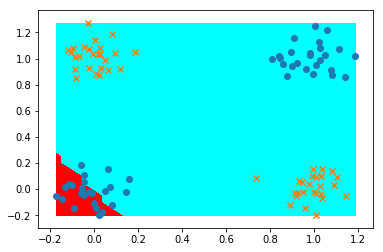

In [262]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# ------------------------ A COMPLETER :
data, labels = create_XOR(25,0.01)
p = ClassifierPerceptron(2, 0.01)
print("Classification du dataset:")
acc = [0]
for i in range(100):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data[i,:][0], data[i,:][1], \
                                                                  labels[i], \
                                                                    p.predict(data[i,:]), \
                                                                   p.score(data[i,:])) )
    acc.append(p.accuracy(data,labels))

# print("Taux de bonne classification sur le dataset train: ", un_perceptron.accuracy(data,labels))


# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset test: ", p.accuracy(data,test_label))   
plot_frontiere(data,labels,p)
plot2DSet(data,labels)

## Étape 4: protocole expérimental

Attention, lorsque l'on évalue un classifieur, il est nécessaire de considérer deux ensembles distincts: un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

<font color="RED" size="+1">**[Q]**</font> Donner les instructions permettant d'évaluer un classifieur KNN et comparer les résultats obtenus avec ceux obtenus par un classifieur linéaire aléatoire sur le même jeu de données.

### Différentes expérimentations

<font color="RED" size="+1">**[Q]**</font> Comparer la performance (en train et test) de plusieurs classifieurs KNN avec différentes valeurs de k. Que pouvez vous constater ?
Idéalement, vous tracerez la performance (accuracy) en fonction de la valeur de k.
Essayez avec différentes configurations de gaussiennes.

Expérimentations sur des datasets réels
-------



## Étape 5 : données réelles UCI

Plusieurs datasets sont téléchargeables depuis: http://mldata.org

Voir : https://scikit-learn.org/0.19/datasets/mldata.html

Voici la fonction permettant de les charger (en spécifiant leur nom). La fonction se charge de charger les données depuis le web.


In [ ]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home='.')
    print(data.data.shape)
    unique=np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
            
loadFile('breast-cancer_scale')
#Les donnees sont dans data.data et data.target

<font color="RED" size="+1">**[Q]**</font> Écrire la fonction `split` permettant de découper un labeledSet données en 2: un ensemble d'apprentissage et un ensemble de test.

<font color="RED" size="+1">**[Q]**</font> Tester différents k-NN , pour différentes valeurs de $k$, et tracer la courbe de performance (accuracy) pour les données d'apprentissage et les données de test.

A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.